In [1]:
import os
import sys


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
from sklearn.inspection import permutation_importance

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_selection import SelectFromModel

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
from statsmodels.regression.linear_model import OLS

In [11]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [12]:
from spectroscopy.utils import load_training_data, get_wavelength_columns
from spectroscopy.model import score_model

# modeling

note: "I think the best is the ground samples from South"

# load in data

In [13]:
df = load_training_data()

In [14]:
df.head()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1749.38,1751.13,1752.88,extra_info,filename,sample_name,sample_date,run_number,process_method,Ammonia-N
0,0.001,0.001,0.001,-27.7720,-110.080,-43.0240,50.165,52.641,52.146,50.020,...,42.985,43.094,43.248,File: Users\stell\Desktop\StellarDat\South 7 ...,South 7 - 7-8-20 #1.TRM,south 7,2020-07-08 00:00:00,1,NaN,0.47
1,0.001,0.001,0.001,-205.5200,-785.090,-407.9100,44.607,46.916,46.875,45.709,...,40.831,40.827,40.896,File: Users\stell\Desktop\StellarDat\South 1 ...,South 1 - 7-8-20-20 #3.TRM,south 1,2020-07-08 20:00:00,3,NaN,0.21
2,0.001,0.001,0.001,-40.4680,-160.080,-67.7330,60.219,62.969,62.520,60.343,...,55.787,55.854,55.982,File: Users\stell\Desktop\StellarDat\South 8 ...,South 8 - 7-8-20 #3.TRM,south 8,2020-07-08 00:00:00,3,NaN,0.33
3,0.001,0.001,0.001,-6.3474,-29.575,-0.4154,51.103,53.461,52.857,50.724,...,43.885,44.003,44.161,File: Users\stell\Desktop\StellarDat\South 10...,South 10 - 7-8-20 #2.TRM,south 10,2020-07-08 00:00:00,2,NaN,0.32
4,0.001,0.001,0.001,-6.3474,-30.279,1.4999,58.542,61.196,60.665,58.458,...,52.137,52.260,52.406,File: Users\stell\Desktop\StellarDat\South 10...,South 10 - 7-8-20 #3.TRM,south 10,2020-07-08 00:00:00,3,NaN,0.32


In [15]:
df.columns

Index(['862.13', '863.88', '865.63', '867.38', '869.13', '870.88', '872.63',
       '874.38', '876.13', '877.88',
       ...
       '1749.38', '1751.13', '1752.88', 'extra_info', 'filename',
       'sample_name', 'sample_date', 'run_number', 'process_method',
       'Ammonia-N'],
      dtype='object', length=517)

In [16]:
feature_columns = get_wavelength_columns(df)

In [17]:
X, y = df[feature_columns], df['Ammonia-N']

In [18]:
y.value_counts(dropna=False)

0.32    12
0.42     6
0.44     6
0.33     6
0.21     6
0.12     6
0.15     6
0.20     6
0.37     6
0.39     6
0.40     3
0.41     3
0.18     3
0.38     3
0.23     3
0.47     3
2.24     3
0.57     3
0.51     3
0.17     3
Name: Ammonia-N, dtype: int64

In [19]:
y.describe()

count    96.000000
mean      0.378125
std       0.356398
min       0.120000
25%       0.207500
50%       0.330000
75%       0.412500
max       2.240000
Name: Ammonia-N, dtype: float64

<AxesSubplot:>

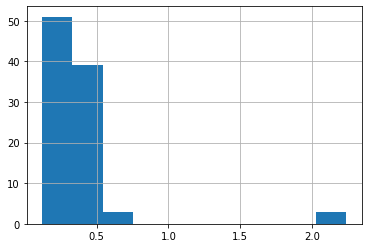

In [20]:
y.hist()

In [21]:
X.describe()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1737.13,1738.88,1740.63,1742.38,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88
count,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.000000e-03,1.000000e-03,1.000000e-03,-22.240277,-83.397928,-17.856960,60.262937,62.50099,62.055229,60.223781,...,54.720625,54.825083,54.946271,55.084667,55.206042,55.292979,55.358396,55.430375,55.516292,55.625792
std,2.179787e-19,2.179787e-19,2.179787e-19,78.400637,306.947040,178.280043,8.797055,8.87673,8.866235,8.819435,...,9.562671,9.566774,9.560269,9.547924,9.538950,9.543365,9.554521,9.558817,9.558564,9.543163
min,1.000000e-03,1.000000e-03,1.000000e-03,-219.800000,-831.610000,-424.710000,35.295000,36.58600,36.099000,34.592000,...,29.977000,30.166000,30.291000,30.434000,30.538000,30.640000,30.768000,30.876000,30.999000,31.153000
25%,1.000000e-03,1.000000e-03,1.000000e-03,-32.401250,-132.792500,-53.935500,57.169000,59.12750,58.713000,56.984250,...,50.890750,51.008750,51.129750,51.268750,51.368000,51.377000,51.376250,51.391750,51.435250,51.555250
50%,1.000000e-03,1.000000e-03,1.000000e-03,-13.299500,-50.816000,-3.153650,61.323500,63.46150,62.906500,61.202000,...,55.781000,55.862000,55.935500,56.041500,56.159000,56.247500,56.335500,56.446000,56.577000,56.677000
75%,1.000000e-03,1.000000e-03,1.000000e-03,16.248750,58.035750,53.004500,66.452250,68.46875,68.093750,66.410000,...,60.895750,61.000500,61.141000,61.309250,61.440000,61.523750,61.544250,61.555000,61.646500,61.728750
max,1.000000e-03,1.000000e-03,1.000000e-03,101.090000,464.490000,369.440000,76.971000,78.99300,78.589000,76.930000,...,73.405000,73.463000,73.491000,73.553000,73.608000,73.651000,73.713000,73.801000,73.876000,73.898000


In [22]:
len(X.columns)

510

this is too many columns, too many features for linear regression. lets try a tree based model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [24]:
len(X_test), len(y_test)

(29, 29)

In [25]:
len(X_train), len(y_train)

(67, 67)

<AxesSubplot:>

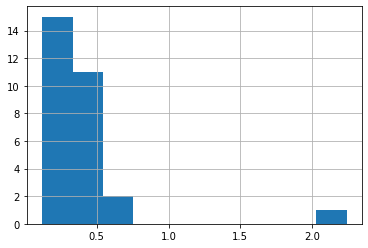

In [26]:
y_test.hist()

<AxesSubplot:>

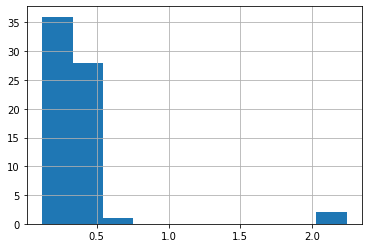

In [27]:
y_train.hist()

# fit baseline model to raw data

In [28]:
model = RandomForestRegressor(random_state=10, max_depth=5, n_estimators=10)

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=10)

# score model

In [30]:
num_features = 10

In [32]:
# feature_names = X_train.columns
# result = permutation_importance(model, X_train, y_train, n_repeats=10,
#                                 random_state=42)
# perm_sorted_idx = result.importances_mean.argsort()

# tree_importance_sorted_idx = np.argsort(model.feature_importances_)
# tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# ax1.barh(tree_indices,
#          model.feature_importances_[tree_importance_sorted_idx][:num_features], height=0.7)
# ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
# ax1.set_yticks(tree_indices)
# ax1.set_ylim((0, len(model.feature_importances_)))
# ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
#             labels=feature_names[perm_sorted_idx])
# fig.tight_layout()
# plt.show()

In [33]:
# def score_model(model, X_train, y_train, X_test, y_test):
#     return {
#         'train_r2':model.score(X_train, y_train),
#         'train_rms3':np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
#         'test_r2':model.score(X_test, y_test),
#         'test_rmse':np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
#     }

In [34]:
score_model(model, X_train, y_train, X_test, y_test)

{'train_r2': 0.9413211239589321,
 'train_mape': 13.329700732180335,
 'train_rms3': 0.08419717198463864,
 'test_r2': 0.9124522919605695,
 'test_mape': 16.93873140444667,
 'test_rmse': 0.10934243921153136}

# select K best features based on feature importance

In [ ]:
feature_selector = SelectFromModel(model, prefit=True)

In [ ]:
X_train_selected = feature_selector.transform(X_train)

In [ ]:
X_train_selected.shape

In [ ]:
len(feature_selector.get_support())

In [ ]:
selected_features = X_test.columns[feature_selector.get_support()]

In [ ]:
selected_features

In [ ]:
X_test_selected = X_test[selected_features]

In [ ]:
model.fit(X_train_selected, y_train)

In [ ]:
score_model(model, X_train_selected, y_train, X_test_selected, y_test)

this might be too many variable for a linear regression to handle. We might need to do some feature engineering to downsample these OR we can try using a model that will handle them better. but let's see how it does.

# plot residuals

In [ ]:
y_pred = model.predict(X_test_selected)

In [ ]:
plt.scatter(y_test, y_test-y_pred)

In [ ]:
y_test.min()

In [ ]:
y_test.max()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.title('Ammonia-N Prediction from Machine Learning Spectroscopy Inference Model')
plt.plot(np.linspace(0, 0.6, len(y_test)), np.linspace(0, 0.6, len(y_test)))
plt.xlabel('True Ammonia-N')
plt.ylabel('Predicted Ammonia-N')
plt.xlim(0,0.6)
plt.ylim(0,0.6)
# plt.savefig('ammonia_prediction_vs_truth.png')

In [ ]:
# regressor_OLS = OLS(endog = y_train, exog = X_train).fit()
# regressor_OLS.summary()

In [ ]:
# lets fill some nA

In [ ]:
# lr = LinearRegression()

In [ ]:
# lr.fit(X, y)